# Importing Libraries 

In [52]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

In [3]:
train_df = pd.read_csv(r"C:\Users\User\Downloads\survey.csv")
train_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [4]:
print(train_df.shape)
print(train_df.describe())
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

<a id='Data_cleaning'></a>
## **2. Data cleaning** ##

In [5]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

In [6]:
train_df = train_df.drop(['comments'], axis= 1)
train_df = train_df.drop(['state'], axis= 1)
train_df = train_df.drop(['Timestamp'], axis= 1)


In [7]:
train_df.isnull().sum().max() 
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [8]:
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)   

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [9]:
gender = train_df['Gender'].str.lower()
gender = train_df['Gender'].unique()

male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]


for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

['female' 'male' 'trans']


In [10]:

train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)



In [12]:
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [13]:
train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


<a id='Encoding_data'></a>
## **3. Encoding data**

In [14]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

train_df = train_df.drop(['Country'], axis= 1)
train_df.head()


label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


### Testing there aren't any missing data

In [15]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

<a id='Covariance_Matrix'></a>
## **4. Covariance Matrix. Variability comparison between categories of variables** 

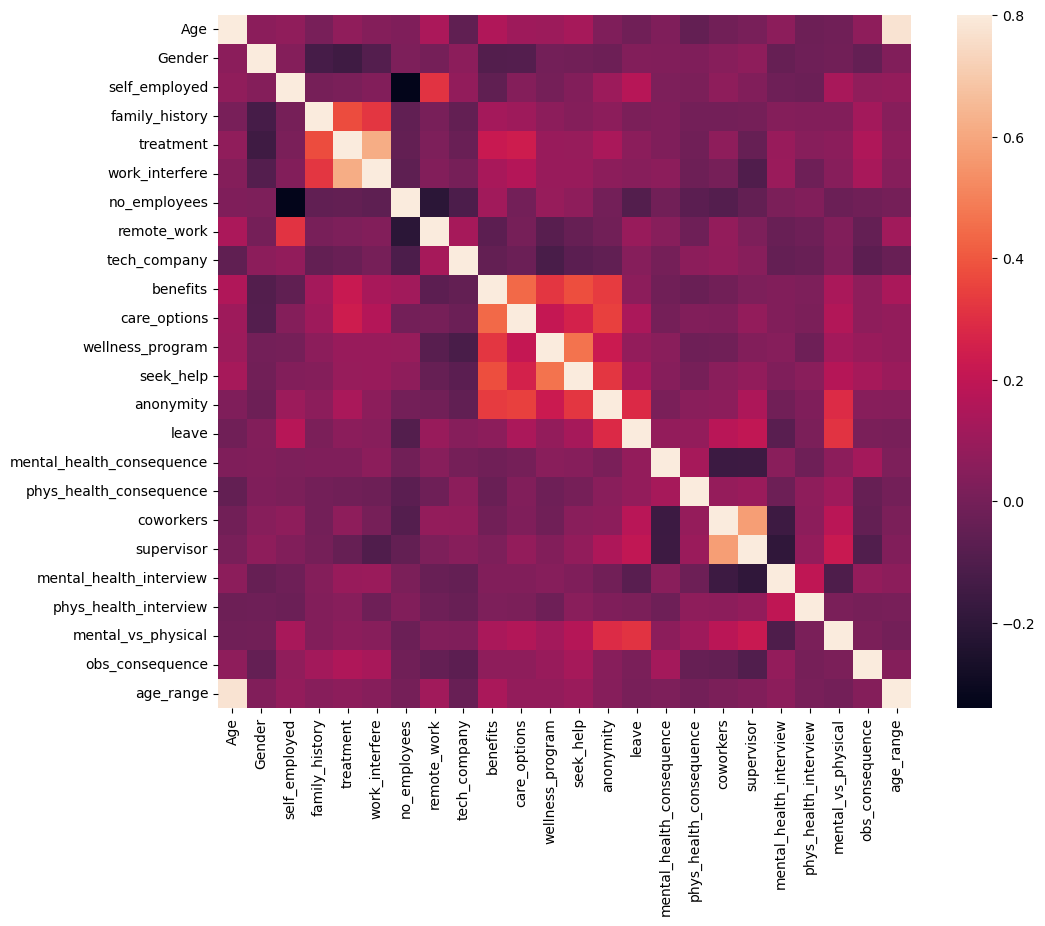

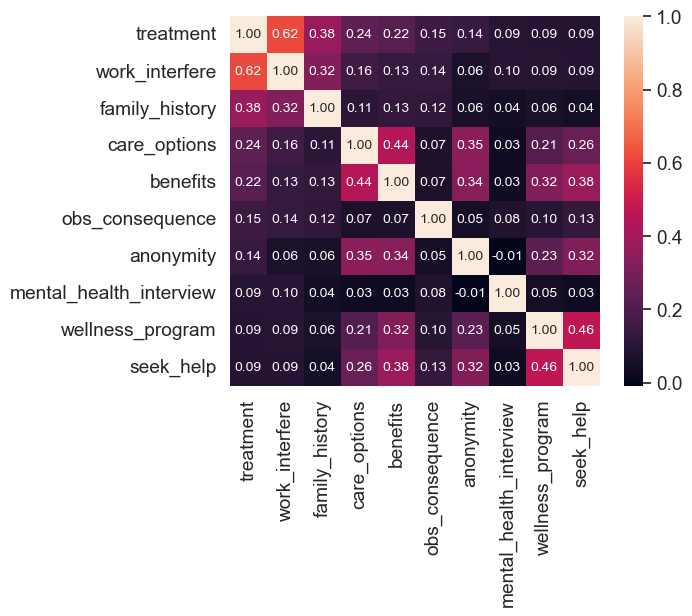

In [16]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<a id='Some_charts_to_see_data_relationship'></a>
## **5. Some charts to see data relationship** 

Distribiution and density by Age

C:\Users\User\AppData\Local\Temp\ipykernel_15008\3117628352.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["Age"], bins=24)


Text(0.5, 0, 'Age')

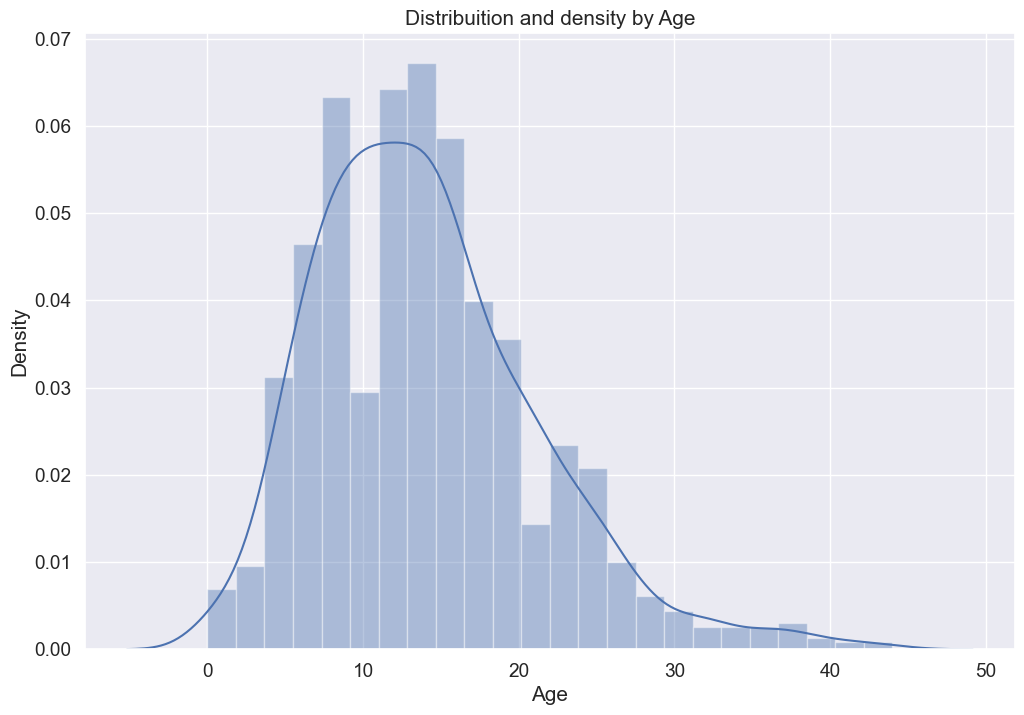

In [17]:
# Distribiution and density by Age
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")


Separate by treatment

How many people has been treated?

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).

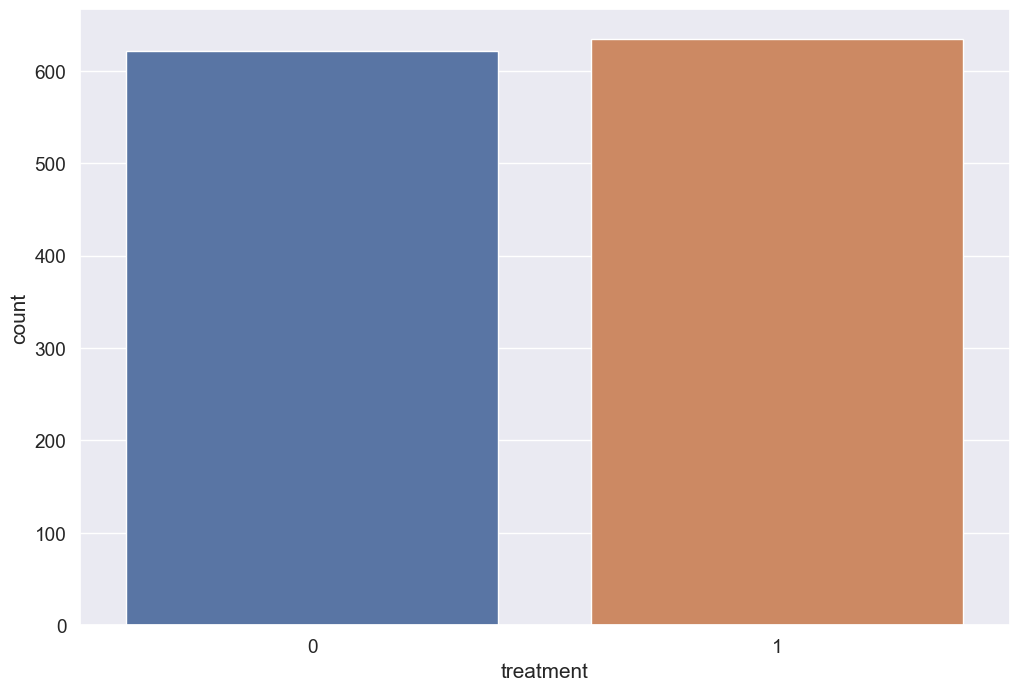

In [19]:
# Let see how many people has been treated
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=train_df)
g.set_xticklabels(labels)

plt.title('Total Distribuition by treated or not')

Draw a nested barplot to show probabilities for class and sex

In [24]:
!pip install seaborn --upgrade

C:\Users\User\AppData\Local\Temp\ipykernel_15008\1232849076.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


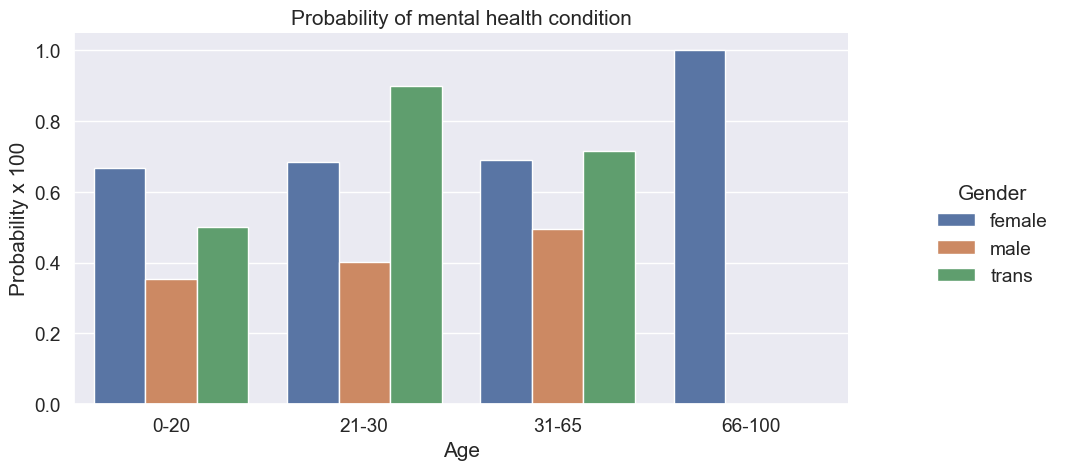

In [26]:


# Replace factorplot with catplot
o = labelDict['label_age_range']
g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Position the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

# Show the plot
plt.show()


Barplot to show probabilities for family history

C:\Users\User\AppData\Local\Temp\ipykernel_15008\595497719.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


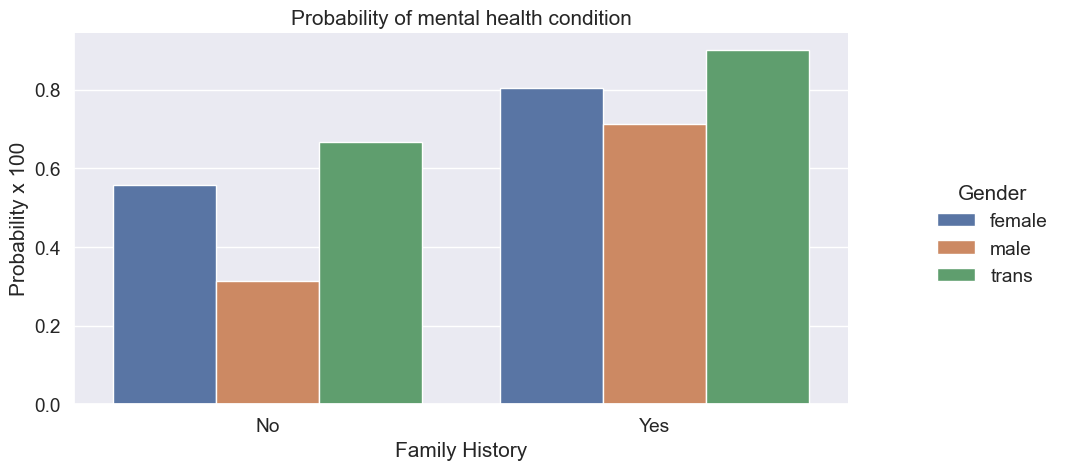

In [27]:
 o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()


Barplot to show probabilities for care options

C:\Users\User\AppData\Local\Temp\ipykernel_15008\1306135452.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


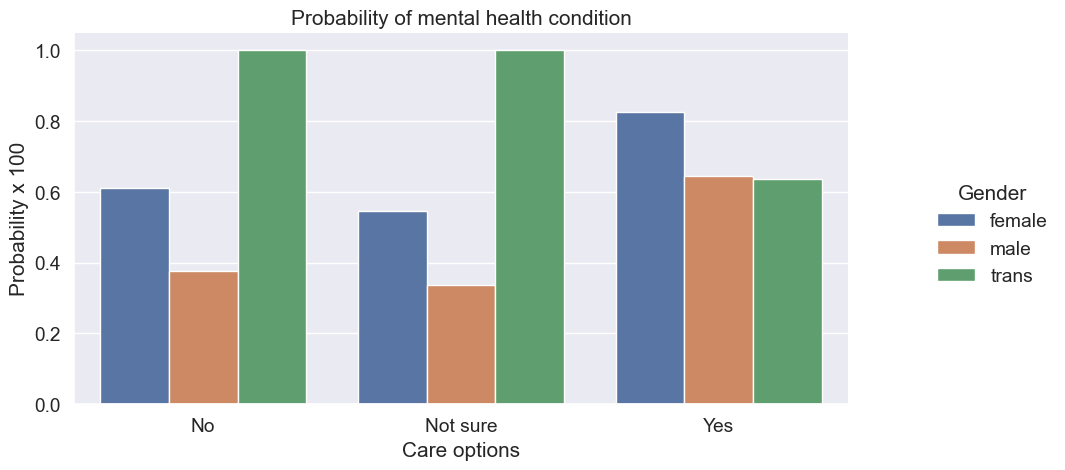

In [28]:
 o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()

<a id='Scaling_and_fitting'></a>
## **6. Scaling and fitting** ##



Features Scaling age because its different from another 


In [29]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


Spliltting the dataset

In [30]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()



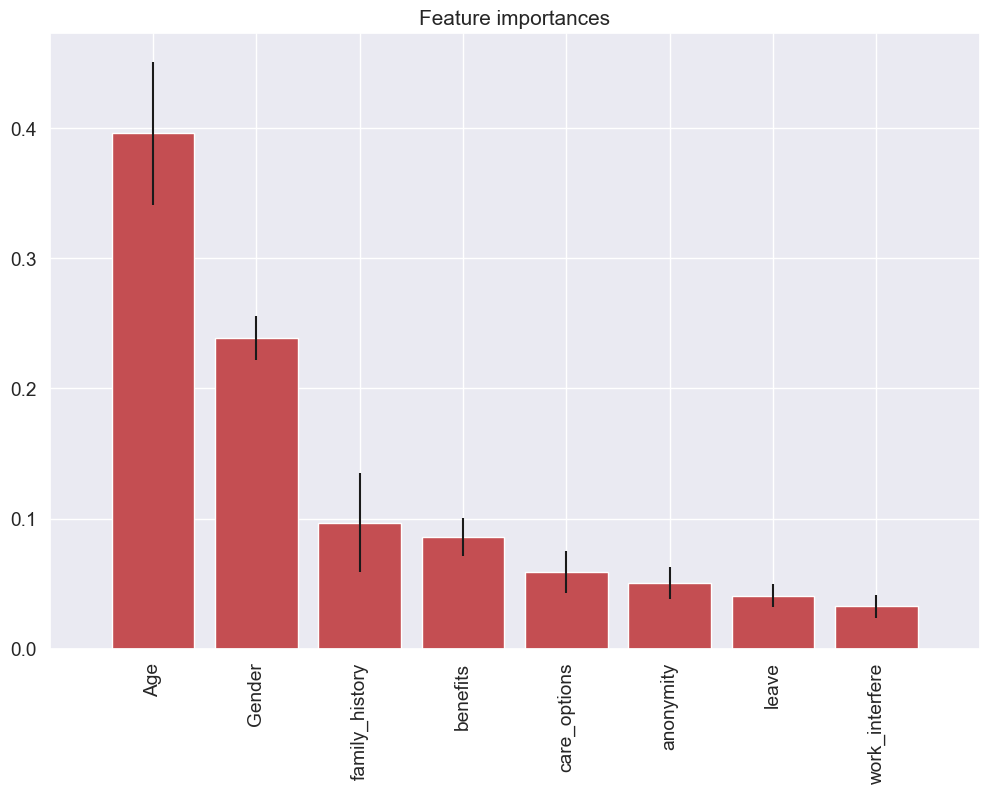

In [31]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [43]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7619047619047619


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model2 = LogisticRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7857142857142857


In [53]:
model3 = xgb.XGBClassifier()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7738095238095238


In [54]:
from catboost import CatBoostClassifier

model4 = CatBoostClassifier()
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Learning rate set to 0.010324
0:	learn: 0.6843373	total: 131ms	remaining: 2m 10s
1:	learn: 0.6767249	total: 135ms	remaining: 1m 7s
2:	learn: 0.6700395	total: 140ms	remaining: 46.4s
3:	learn: 0.6629616	total: 145ms	remaining: 36.1s
4:	learn: 0.6558548	total: 150ms	remaining: 29.9s
5:	learn: 0.6486328	total: 156ms	remaining: 25.8s
6:	learn: 0.6425276	total: 160ms	remaining: 22.7s
7:	learn: 0.6351991	total: 165ms	remaining: 20.5s
8:	learn: 0.6291471	total: 168ms	remaining: 18.4s
9:	learn: 0.6225926	total: 171ms	remaining: 16.9s
10:	learn: 0.6165503	total: 173ms	remaining: 15.6s
11:	learn: 0.6099963	total: 175ms	remaining: 14.4s
12:	learn: 0.6036962	total: 177ms	remaining: 13.5s
13:	learn: 0.5982247	total: 179ms	remaining: 12.6s
14:	learn: 0.5929755	total: 181ms	remaining: 11.9s
15:	learn: 0.5873106	total: 182ms	remaining: 11.2s
16:	learn: 0.5820843	total: 184ms	remaining: 10.6s
17:	learn: 0.5768134	total: 186ms	remaining: 10.1s
18:	learn: 0.5719991	total: 188ms	remaining: 9.71s
19:	learn:

202:	learn: 0.3314114	total: 582ms	remaining: 2.29s
203:	learn: 0.3309897	total: 585ms	remaining: 2.28s
204:	learn: 0.3308796	total: 588ms	remaining: 2.28s
205:	learn: 0.3307626	total: 591ms	remaining: 2.28s
206:	learn: 0.3303803	total: 593ms	remaining: 2.27s
207:	learn: 0.3300006	total: 596ms	remaining: 2.27s
208:	learn: 0.3297363	total: 599ms	remaining: 2.27s
209:	learn: 0.3295653	total: 601ms	remaining: 2.26s
210:	learn: 0.3291779	total: 603ms	remaining: 2.26s
211:	learn: 0.3286896	total: 606ms	remaining: 2.25s
212:	learn: 0.3286585	total: 608ms	remaining: 2.25s
213:	learn: 0.3283566	total: 611ms	remaining: 2.24s
214:	learn: 0.3283286	total: 613ms	remaining: 2.24s
215:	learn: 0.3279956	total: 615ms	remaining: 2.23s
216:	learn: 0.3279212	total: 617ms	remaining: 2.23s
217:	learn: 0.3276549	total: 620ms	remaining: 2.22s
218:	learn: 0.3276230	total: 621ms	remaining: 2.22s
219:	learn: 0.3272425	total: 624ms	remaining: 2.21s
220:	learn: 0.3270200	total: 626ms	remaining: 2.21s
221:	learn: 

378:	learn: 0.2942599	total: 963ms	remaining: 1.58s
379:	learn: 0.2941076	total: 965ms	remaining: 1.57s
380:	learn: 0.2939863	total: 968ms	remaining: 1.57s
381:	learn: 0.2939408	total: 970ms	remaining: 1.57s
382:	learn: 0.2938886	total: 972ms	remaining: 1.56s
383:	learn: 0.2938061	total: 974ms	remaining: 1.56s
384:	learn: 0.2936865	total: 976ms	remaining: 1.56s
385:	learn: 0.2934260	total: 979ms	remaining: 1.56s
386:	learn: 0.2932493	total: 982ms	remaining: 1.55s
387:	learn: 0.2932376	total: 984ms	remaining: 1.55s
388:	learn: 0.2931699	total: 987ms	remaining: 1.55s
389:	learn: 0.2929708	total: 989ms	remaining: 1.55s
390:	learn: 0.2928652	total: 991ms	remaining: 1.54s
391:	learn: 0.2926213	total: 994ms	remaining: 1.54s
392:	learn: 0.2924031	total: 996ms	remaining: 1.54s
393:	learn: 0.2921131	total: 999ms	remaining: 1.54s
394:	learn: 0.2919484	total: 1s	remaining: 1.53s
395:	learn: 0.2916442	total: 1s	remaining: 1.53s
396:	learn: 0.2915315	total: 1s	remaining: 1.53s
397:	learn: 0.2914024

552:	learn: 0.2672956	total: 1.34s	remaining: 1.08s
553:	learn: 0.2671977	total: 1.34s	remaining: 1.08s
554:	learn: 0.2670800	total: 1.35s	remaining: 1.08s
555:	learn: 0.2669237	total: 1.35s	remaining: 1.08s
556:	learn: 0.2668244	total: 1.35s	remaining: 1.08s
557:	learn: 0.2667182	total: 1.35s	remaining: 1.07s
558:	learn: 0.2664965	total: 1.36s	remaining: 1.07s
559:	learn: 0.2664527	total: 1.36s	remaining: 1.07s
560:	learn: 0.2661701	total: 1.36s	remaining: 1.07s
561:	learn: 0.2660693	total: 1.37s	remaining: 1.06s
562:	learn: 0.2659575	total: 1.37s	remaining: 1.06s
563:	learn: 0.2657991	total: 1.37s	remaining: 1.06s
564:	learn: 0.2656883	total: 1.37s	remaining: 1.06s
565:	learn: 0.2654692	total: 1.38s	remaining: 1.05s
566:	learn: 0.2652305	total: 1.38s	remaining: 1.05s
567:	learn: 0.2651906	total: 1.38s	remaining: 1.05s
568:	learn: 0.2649483	total: 1.38s	remaining: 1.05s
569:	learn: 0.2647979	total: 1.38s	remaining: 1.04s
570:	learn: 0.2645601	total: 1.39s	remaining: 1.04s
571:	learn: 

722:	learn: 0.2444031	total: 1.72s	remaining: 660ms
723:	learn: 0.2442754	total: 1.73s	remaining: 658ms
724:	learn: 0.2441559	total: 1.73s	remaining: 656ms
725:	learn: 0.2440018	total: 1.73s	remaining: 654ms
726:	learn: 0.2438329	total: 1.73s	remaining: 651ms
727:	learn: 0.2437496	total: 1.74s	remaining: 649ms
728:	learn: 0.2435532	total: 1.74s	remaining: 647ms
729:	learn: 0.2434421	total: 1.74s	remaining: 645ms
730:	learn: 0.2433413	total: 1.75s	remaining: 643ms
731:	learn: 0.2432259	total: 1.75s	remaining: 640ms
732:	learn: 0.2430950	total: 1.75s	remaining: 638ms
733:	learn: 0.2428313	total: 1.75s	remaining: 636ms
734:	learn: 0.2427849	total: 1.76s	remaining: 633ms
735:	learn: 0.2426498	total: 1.76s	remaining: 631ms
736:	learn: 0.2425847	total: 1.76s	remaining: 629ms
737:	learn: 0.2424761	total: 1.76s	remaining: 626ms
738:	learn: 0.2423767	total: 1.77s	remaining: 624ms
739:	learn: 0.2423290	total: 1.77s	remaining: 621ms
740:	learn: 0.2421651	total: 1.77s	remaining: 619ms
741:	learn: 

890:	learn: 0.2241812	total: 2.11s	remaining: 258ms
891:	learn: 0.2240765	total: 2.11s	remaining: 256ms
892:	learn: 0.2239013	total: 2.11s	remaining: 253ms
893:	learn: 0.2237526	total: 2.12s	remaining: 251ms
894:	learn: 0.2236921	total: 2.12s	remaining: 249ms
895:	learn: 0.2235536	total: 2.12s	remaining: 246ms
896:	learn: 0.2234808	total: 2.13s	remaining: 244ms
897:	learn: 0.2233429	total: 2.13s	remaining: 242ms
898:	learn: 0.2232666	total: 2.13s	remaining: 239ms
899:	learn: 0.2232165	total: 2.13s	remaining: 237ms
900:	learn: 0.2230577	total: 2.14s	remaining: 235ms
901:	learn: 0.2229758	total: 2.14s	remaining: 232ms
902:	learn: 0.2228216	total: 2.14s	remaining: 230ms
903:	learn: 0.2227026	total: 2.14s	remaining: 228ms
904:	learn: 0.2226142	total: 2.15s	remaining: 225ms
905:	learn: 0.2225403	total: 2.15s	remaining: 223ms
906:	learn: 0.2223585	total: 2.15s	remaining: 220ms
907:	learn: 0.2222781	total: 2.15s	remaining: 218ms
908:	learn: 0.2221828	total: 2.15s	remaining: 216ms
909:	learn: 

In [57]:
model5 = DecisionTreeClassifier()
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7063492063492064


In [55]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

model = lgb.train(params, train_data, num_boost_round=100)

y_pred = model.predict(X_test)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [59]:
models = [
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('XGBoost', xgb.XGBClassifier()),
    ('CatBoost', CatBoostClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('LightGBM', lgb.LGBMClassifier())
]

results = []

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((model_name, accuracy))

df = pd.DataFrame(results, columns=['Model', 'Accuracy'])
print(df)

Learning rate set to 0.010324
0:	learn: 0.6843373	total: 2.53ms	remaining: 2.53s
1:	learn: 0.6767249	total: 4.33ms	remaining: 2.16s
2:	learn: 0.6700395	total: 6.03ms	remaining: 2s
3:	learn: 0.6629616	total: 8.15ms	remaining: 2.03s
4:	learn: 0.6558548	total: 10.1ms	remaining: 2.01s
5:	learn: 0.6486328	total: 12.1ms	remaining: 2s
6:	learn: 0.6425276	total: 13.8ms	remaining: 1.95s
7:	learn: 0.6351991	total: 15.8ms	remaining: 1.96s
8:	learn: 0.6291471	total: 17.4ms	remaining: 1.92s
9:	learn: 0.6225926	total: 19.4ms	remaining: 1.92s
10:	learn: 0.6165503	total: 21.5ms	remaining: 1.93s
11:	learn: 0.6099963	total: 23.5ms	remaining: 1.94s
12:	learn: 0.6036962	total: 25.5ms	remaining: 1.93s
13:	learn: 0.5982247	total: 27.4ms	remaining: 1.93s
14:	learn: 0.5929755	total: 29.3ms	remaining: 1.93s
15:	learn: 0.5873106	total: 31.1ms	remaining: 1.91s
16:	learn: 0.5820843	total: 32.9ms	remaining: 1.9s
17:	learn: 0.5768134	total: 34.9ms	remaining: 1.9s
18:	learn: 0.5719991	total: 36.7ms	remaining: 1.89s


190:	learn: 0.3344485	total: 389ms	remaining: 1.65s
191:	learn: 0.3341620	total: 392ms	remaining: 1.65s
192:	learn: 0.3338330	total: 394ms	remaining: 1.65s
193:	learn: 0.3335872	total: 396ms	remaining: 1.65s
194:	learn: 0.3335369	total: 398ms	remaining: 1.64s
195:	learn: 0.3334786	total: 400ms	remaining: 1.64s
196:	learn: 0.3331953	total: 402ms	remaining: 1.64s
197:	learn: 0.3330737	total: 404ms	remaining: 1.64s
198:	learn: 0.3330229	total: 406ms	remaining: 1.63s
199:	learn: 0.3324187	total: 408ms	remaining: 1.63s
200:	learn: 0.3320667	total: 411ms	remaining: 1.63s
201:	learn: 0.3317067	total: 414ms	remaining: 1.64s
202:	learn: 0.3314114	total: 416ms	remaining: 1.63s
203:	learn: 0.3309897	total: 419ms	remaining: 1.63s
204:	learn: 0.3308796	total: 421ms	remaining: 1.63s
205:	learn: 0.3307626	total: 424ms	remaining: 1.63s
206:	learn: 0.3303803	total: 426ms	remaining: 1.63s
207:	learn: 0.3300006	total: 429ms	remaining: 1.63s
208:	learn: 0.3297363	total: 432ms	remaining: 1.63s
209:	learn: 

372:	learn: 0.2953355	total: 781ms	remaining: 1.31s
373:	learn: 0.2952373	total: 784ms	remaining: 1.31s
374:	learn: 0.2950498	total: 787ms	remaining: 1.31s
375:	learn: 0.2948121	total: 790ms	remaining: 1.31s
376:	learn: 0.2946871	total: 792ms	remaining: 1.31s
377:	learn: 0.2944348	total: 795ms	remaining: 1.31s
378:	learn: 0.2942599	total: 798ms	remaining: 1.31s
379:	learn: 0.2941076	total: 801ms	remaining: 1.31s
380:	learn: 0.2939863	total: 803ms	remaining: 1.3s
381:	learn: 0.2939408	total: 806ms	remaining: 1.3s
382:	learn: 0.2938886	total: 808ms	remaining: 1.3s
383:	learn: 0.2938061	total: 810ms	remaining: 1.3s
384:	learn: 0.2936865	total: 812ms	remaining: 1.3s
385:	learn: 0.2934260	total: 814ms	remaining: 1.29s
386:	learn: 0.2932493	total: 817ms	remaining: 1.29s
387:	learn: 0.2932376	total: 819ms	remaining: 1.29s
388:	learn: 0.2931699	total: 822ms	remaining: 1.29s
389:	learn: 0.2929708	total: 824ms	remaining: 1.29s
390:	learn: 0.2928652	total: 826ms	remaining: 1.29s
391:	learn: 0.292

546:	learn: 0.2681714	total: 1.16s	remaining: 964ms
547:	learn: 0.2679156	total: 1.17s	remaining: 962ms
548:	learn: 0.2677635	total: 1.17s	remaining: 960ms
549:	learn: 0.2675503	total: 1.17s	remaining: 958ms
550:	learn: 0.2673545	total: 1.17s	remaining: 957ms
551:	learn: 0.2672985	total: 1.18s	remaining: 955ms
552:	learn: 0.2672956	total: 1.18s	remaining: 952ms
553:	learn: 0.2671977	total: 1.18s	remaining: 950ms
554:	learn: 0.2670800	total: 1.18s	remaining: 948ms
555:	learn: 0.2669237	total: 1.19s	remaining: 947ms
556:	learn: 0.2668244	total: 1.19s	remaining: 945ms
557:	learn: 0.2667182	total: 1.19s	remaining: 943ms
558:	learn: 0.2664965	total: 1.19s	remaining: 941ms
559:	learn: 0.2664527	total: 1.19s	remaining: 939ms
560:	learn: 0.2661701	total: 1.2s	remaining: 937ms
561:	learn: 0.2660693	total: 1.2s	remaining: 935ms
562:	learn: 0.2659575	total: 1.2s	remaining: 933ms
563:	learn: 0.2657991	total: 1.21s	remaining: 932ms
564:	learn: 0.2656883	total: 1.21s	remaining: 930ms
565:	learn: 0.2

729:	learn: 0.2434421	total: 1.55s	remaining: 575ms
730:	learn: 0.2433413	total: 1.56s	remaining: 573ms
731:	learn: 0.2432259	total: 1.56s	remaining: 571ms
732:	learn: 0.2430950	total: 1.56s	remaining: 569ms
733:	learn: 0.2428313	total: 1.56s	remaining: 567ms
734:	learn: 0.2427849	total: 1.57s	remaining: 565ms
735:	learn: 0.2426498	total: 1.57s	remaining: 564ms
736:	learn: 0.2425847	total: 1.57s	remaining: 562ms
737:	learn: 0.2424761	total: 1.58s	remaining: 560ms
738:	learn: 0.2423767	total: 1.58s	remaining: 558ms
739:	learn: 0.2423290	total: 1.58s	remaining: 556ms
740:	learn: 0.2421651	total: 1.58s	remaining: 554ms
741:	learn: 0.2420437	total: 1.59s	remaining: 552ms
742:	learn: 0.2418558	total: 1.59s	remaining: 549ms
743:	learn: 0.2418063	total: 1.59s	remaining: 547ms
744:	learn: 0.2417149	total: 1.59s	remaining: 545ms
745:	learn: 0.2415929	total: 1.59s	remaining: 543ms
746:	learn: 0.2415113	total: 1.6s	remaining: 541ms
747:	learn: 0.2413579	total: 1.6s	remaining: 539ms
748:	learn: 0.

898:	learn: 0.2232666	total: 1.93s	remaining: 216ms
899:	learn: 0.2232165	total: 1.93s	remaining: 214ms
900:	learn: 0.2230577	total: 1.93s	remaining: 212ms
901:	learn: 0.2229758	total: 1.93s	remaining: 210ms
902:	learn: 0.2228216	total: 1.93s	remaining: 208ms
903:	learn: 0.2227026	total: 1.94s	remaining: 206ms
904:	learn: 0.2226142	total: 1.94s	remaining: 203ms
905:	learn: 0.2225403	total: 1.94s	remaining: 201ms
906:	learn: 0.2223585	total: 1.94s	remaining: 199ms
907:	learn: 0.2222781	total: 1.95s	remaining: 197ms
908:	learn: 0.2221828	total: 1.95s	remaining: 195ms
909:	learn: 0.2220967	total: 1.95s	remaining: 193ms
910:	learn: 0.2220155	total: 1.95s	remaining: 191ms
911:	learn: 0.2218804	total: 1.95s	remaining: 189ms
912:	learn: 0.2218078	total: 1.96s	remaining: 186ms
913:	learn: 0.2216510	total: 1.96s	remaining: 184ms
914:	learn: 0.2214590	total: 1.96s	remaining: 182ms
915:	learn: 0.2213916	total: 1.96s	remaining: 180ms
916:	learn: 0.2212495	total: 1.96s	remaining: 178ms
917:	learn: 

In [60]:
df

,Model,Accuracy
0,Random Forest,0.765873
1,Logistic Regression,0.785714
2,XGBoost,0.773810
3,CatBoost,0.789683
4,Decision Tree,0.694444
5,LightGBM,0.781746


Learning rate set to 0.010324
0:	learn: 0.6843373	total: 2.2ms	remaining: 2.2s
1:	learn: 0.6767249	total: 4.02ms	remaining: 2.01s
2:	learn: 0.6700395	total: 5.71ms	remaining: 1.9s
3:	learn: 0.6629616	total: 7.81ms	remaining: 1.94s
4:	learn: 0.6558548	total: 9.85ms	remaining: 1.96s
5:	learn: 0.6486328	total: 11.9ms	remaining: 1.97s
6:	learn: 0.6425276	total: 13.6ms	remaining: 1.93s
7:	learn: 0.6351991	total: 15.6ms	remaining: 1.94s
8:	learn: 0.6291471	total: 17.2ms	remaining: 1.9s
9:	learn: 0.6225926	total: 19.3ms	remaining: 1.91s
10:	learn: 0.6165503	total: 21.3ms	remaining: 1.91s
11:	learn: 0.6099963	total: 23.3ms	remaining: 1.92s
12:	learn: 0.6036962	total: 25.5ms	remaining: 1.93s
13:	learn: 0.5982247	total: 27.4ms	remaining: 1.93s
14:	learn: 0.5929755	total: 29.2ms	remaining: 1.92s
15:	learn: 0.5873106	total: 31ms	remaining: 1.9s
16:	learn: 0.5820843	total: 32.8ms	remaining: 1.9s
17:	learn: 0.5768134	total: 34.8ms	remaining: 1.9s
18:	learn: 0.5719991	total: 36.7ms	remaining: 1.9s
19

192:	learn: 0.3338330	total: 377ms	remaining: 1.57s
193:	learn: 0.3335872	total: 379ms	remaining: 1.57s
194:	learn: 0.3335369	total: 381ms	remaining: 1.57s
195:	learn: 0.3334786	total: 383ms	remaining: 1.57s
196:	learn: 0.3331953	total: 385ms	remaining: 1.57s
197:	learn: 0.3330737	total: 387ms	remaining: 1.57s
198:	learn: 0.3330229	total: 389ms	remaining: 1.56s
199:	learn: 0.3324187	total: 391ms	remaining: 1.56s
200:	learn: 0.3320667	total: 394ms	remaining: 1.57s
201:	learn: 0.3317067	total: 397ms	remaining: 1.57s
202:	learn: 0.3314114	total: 399ms	remaining: 1.57s
203:	learn: 0.3309897	total: 402ms	remaining: 1.57s
204:	learn: 0.3308796	total: 404ms	remaining: 1.57s
205:	learn: 0.3307626	total: 406ms	remaining: 1.56s
206:	learn: 0.3303803	total: 408ms	remaining: 1.56s
207:	learn: 0.3300006	total: 411ms	remaining: 1.56s
208:	learn: 0.3297363	total: 414ms	remaining: 1.56s
209:	learn: 0.3295653	total: 416ms	remaining: 1.56s
210:	learn: 0.3291779	total: 418ms	remaining: 1.56s
211:	learn: 

383:	learn: 0.2938061	total: 765ms	remaining: 1.23s
384:	learn: 0.2936865	total: 768ms	remaining: 1.23s
385:	learn: 0.2934260	total: 771ms	remaining: 1.23s
386:	learn: 0.2932493	total: 773ms	remaining: 1.23s
387:	learn: 0.2932376	total: 775ms	remaining: 1.22s
388:	learn: 0.2931699	total: 778ms	remaining: 1.22s
389:	learn: 0.2929708	total: 781ms	remaining: 1.22s
390:	learn: 0.2928652	total: 783ms	remaining: 1.22s
391:	learn: 0.2926213	total: 786ms	remaining: 1.22s
392:	learn: 0.2924031	total: 789ms	remaining: 1.22s
393:	learn: 0.2921131	total: 791ms	remaining: 1.22s
394:	learn: 0.2919484	total: 794ms	remaining: 1.22s
395:	learn: 0.2916442	total: 796ms	remaining: 1.21s
396:	learn: 0.2915315	total: 799ms	remaining: 1.21s
397:	learn: 0.2914024	total: 802ms	remaining: 1.21s
398:	learn: 0.2912356	total: 804ms	remaining: 1.21s
399:	learn: 0.2911443	total: 807ms	remaining: 1.21s
400:	learn: 0.2911117	total: 809ms	remaining: 1.21s
401:	learn: 0.2909045	total: 811ms	remaining: 1.21s
402:	learn: 

546:	learn: 0.2681714	total: 1.15s	remaining: 952ms
547:	learn: 0.2679156	total: 1.15s	remaining: 951ms
548:	learn: 0.2677635	total: 1.16s	remaining: 949ms
549:	learn: 0.2675503	total: 1.16s	remaining: 947ms
550:	learn: 0.2673545	total: 1.16s	remaining: 946ms
551:	learn: 0.2672985	total: 1.16s	remaining: 944ms
552:	learn: 0.2672956	total: 1.17s	remaining: 942ms
553:	learn: 0.2671977	total: 1.17s	remaining: 941ms
554:	learn: 0.2670800	total: 1.17s	remaining: 939ms
555:	learn: 0.2669237	total: 1.17s	remaining: 938ms
556:	learn: 0.2668244	total: 1.18s	remaining: 936ms
557:	learn: 0.2667182	total: 1.18s	remaining: 934ms
558:	learn: 0.2664965	total: 1.18s	remaining: 932ms
559:	learn: 0.2664527	total: 1.18s	remaining: 930ms
560:	learn: 0.2661701	total: 1.19s	remaining: 928ms
561:	learn: 0.2660693	total: 1.19s	remaining: 927ms
562:	learn: 0.2659575	total: 1.19s	remaining: 926ms
563:	learn: 0.2657991	total: 1.2s	remaining: 925ms
564:	learn: 0.2656883	total: 1.2s	remaining: 924ms
565:	learn: 0.

765:	learn: 0.2392136	total: 1.72s	remaining: 524ms
766:	learn: 0.2391518	total: 1.72s	remaining: 522ms
767:	learn: 0.2390445	total: 1.72s	remaining: 520ms
768:	learn: 0.2388000	total: 1.72s	remaining: 517ms
769:	learn: 0.2387773	total: 1.72s	remaining: 515ms
770:	learn: 0.2386607	total: 1.73s	remaining: 513ms
771:	learn: 0.2385470	total: 1.73s	remaining: 511ms
772:	learn: 0.2384733	total: 1.73s	remaining: 509ms
773:	learn: 0.2383667	total: 1.73s	remaining: 507ms
774:	learn: 0.2382616	total: 1.74s	remaining: 504ms
775:	learn: 0.2380890	total: 1.74s	remaining: 502ms
776:	learn: 0.2380389	total: 1.74s	remaining: 500ms
777:	learn: 0.2379138	total: 1.74s	remaining: 498ms
778:	learn: 0.2378077	total: 1.75s	remaining: 495ms
779:	learn: 0.2377357	total: 1.75s	remaining: 493ms
780:	learn: 0.2376547	total: 1.75s	remaining: 491ms
781:	learn: 0.2375212	total: 1.75s	remaining: 488ms
782:	learn: 0.2372685	total: 1.75s	remaining: 486ms
783:	learn: 0.2371314	total: 1.76s	remaining: 484ms
784:	learn: 

925:	learn: 0.2202693	total: 2.1s	remaining: 168ms
926:	learn: 0.2201878	total: 2.11s	remaining: 166ms
927:	learn: 0.2200469	total: 2.11s	remaining: 164ms
928:	learn: 0.2199832	total: 2.11s	remaining: 162ms
929:	learn: 0.2197917	total: 2.12s	remaining: 159ms
930:	learn: 0.2196727	total: 2.12s	remaining: 157ms
931:	learn: 0.2196018	total: 2.12s	remaining: 155ms
932:	learn: 0.2194398	total: 2.12s	remaining: 153ms
933:	learn: 0.2193385	total: 2.13s	remaining: 150ms
934:	learn: 0.2191524	total: 2.13s	remaining: 148ms
935:	learn: 0.2190668	total: 2.13s	remaining: 146ms
936:	learn: 0.2189094	total: 2.13s	remaining: 143ms
937:	learn: 0.2188305	total: 2.13s	remaining: 141ms
938:	learn: 0.2187258	total: 2.14s	remaining: 139ms
939:	learn: 0.2186574	total: 2.14s	remaining: 137ms
940:	learn: 0.2184814	total: 2.14s	remaining: 134ms
941:	learn: 0.2183376	total: 2.14s	remaining: 132ms
942:	learn: 0.2182403	total: 2.15s	remaining: 130ms
943:	learn: 0.2181649	total: 2.15s	remaining: 127ms
944:	learn: 0

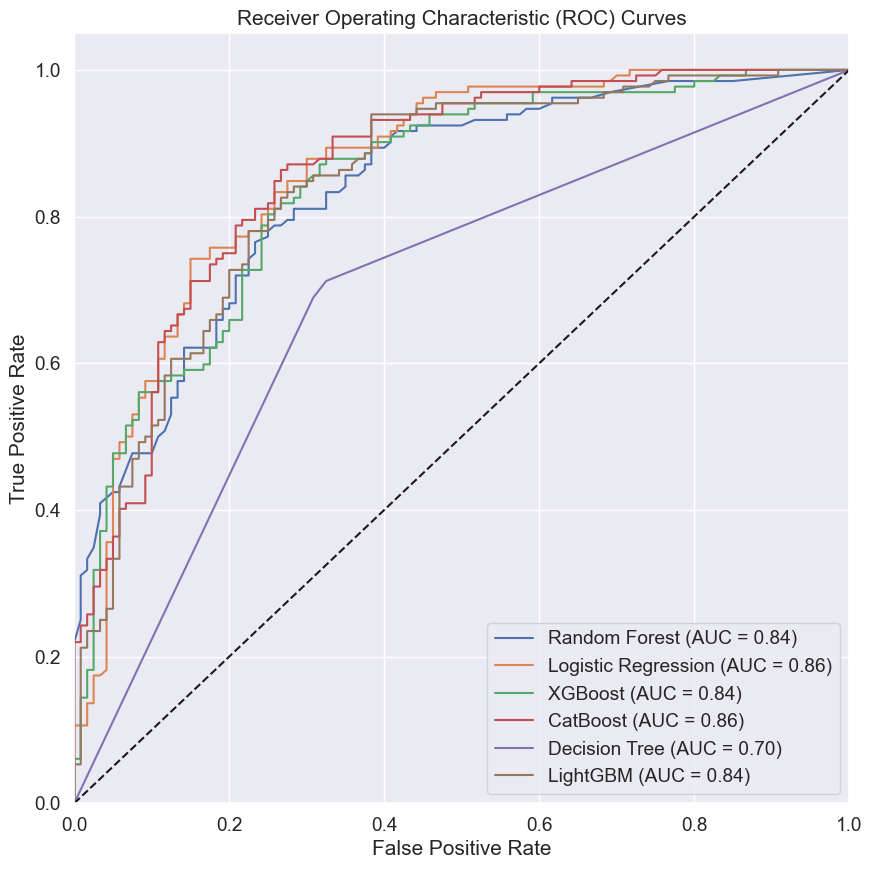

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb

classifiers = [
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('XGBoost', XGBClassifier()),
    ('CatBoost', CatBoostClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('LightGBM', lgb.LGBMClassifier())
]

plt.figure(figsize=(10, 10))

for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred_prob = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

Learning rate set to 0.010324
0:	learn: 0.6843373	total: 2.13ms	remaining: 2.13s
1:	learn: 0.6767249	total: 3.82ms	remaining: 1.91s
2:	learn: 0.6700395	total: 5.28ms	remaining: 1.75s
3:	learn: 0.6629616	total: 7.21ms	remaining: 1.8s
4:	learn: 0.6558548	total: 9.18ms	remaining: 1.83s
5:	learn: 0.6486328	total: 10.9ms	remaining: 1.8s
6:	learn: 0.6425276	total: 12.2ms	remaining: 1.73s
7:	learn: 0.6351991	total: 13.9ms	remaining: 1.73s
8:	learn: 0.6291471	total: 15.2ms	remaining: 1.67s
9:	learn: 0.6225926	total: 16.8ms	remaining: 1.66s
10:	learn: 0.6165503	total: 19ms	remaining: 1.71s
11:	learn: 0.6099963	total: 21.4ms	remaining: 1.76s
12:	learn: 0.6036962	total: 23.6ms	remaining: 1.79s
13:	learn: 0.5982247	total: 25.6ms	remaining: 1.81s
14:	learn: 0.5929755	total: 27.6ms	remaining: 1.81s
15:	learn: 0.5873106	total: 29.2ms	remaining: 1.79s
16:	learn: 0.5820843	total: 31ms	remaining: 1.79s
17:	learn: 0.5768134	total: 33ms	remaining: 1.8s
18:	learn: 0.5719991	total: 34.6ms	remaining: 1.79s
1

184:	learn: 0.3366707	total: 374ms	remaining: 1.65s
185:	learn: 0.3362971	total: 377ms	remaining: 1.65s
186:	learn: 0.3360387	total: 379ms	remaining: 1.65s
187:	learn: 0.3356101	total: 382ms	remaining: 1.65s
188:	learn: 0.3351815	total: 384ms	remaining: 1.65s
189:	learn: 0.3348395	total: 387ms	remaining: 1.65s
190:	learn: 0.3344485	total: 390ms	remaining: 1.65s
191:	learn: 0.3341620	total: 393ms	remaining: 1.65s
192:	learn: 0.3338330	total: 396ms	remaining: 1.66s
193:	learn: 0.3335872	total: 399ms	remaining: 1.66s
194:	learn: 0.3335369	total: 401ms	remaining: 1.66s
195:	learn: 0.3334786	total: 403ms	remaining: 1.66s
196:	learn: 0.3331953	total: 406ms	remaining: 1.66s
197:	learn: 0.3330737	total: 409ms	remaining: 1.66s
198:	learn: 0.3330229	total: 412ms	remaining: 1.66s
199:	learn: 0.3324187	total: 416ms	remaining: 1.66s
200:	learn: 0.3320667	total: 419ms	remaining: 1.66s
201:	learn: 0.3317067	total: 421ms	remaining: 1.66s
202:	learn: 0.3314114	total: 423ms	remaining: 1.66s
203:	learn: 

375:	learn: 0.2948121	total: 766ms	remaining: 1.27s
376:	learn: 0.2946871	total: 769ms	remaining: 1.27s
377:	learn: 0.2944348	total: 772ms	remaining: 1.27s
378:	learn: 0.2942599	total: 774ms	remaining: 1.27s
379:	learn: 0.2941076	total: 777ms	remaining: 1.27s
380:	learn: 0.2939863	total: 780ms	remaining: 1.27s
381:	learn: 0.2939408	total: 783ms	remaining: 1.27s
382:	learn: 0.2938886	total: 786ms	remaining: 1.26s
383:	learn: 0.2938061	total: 788ms	remaining: 1.26s
384:	learn: 0.2936865	total: 790ms	remaining: 1.26s
385:	learn: 0.2934260	total: 793ms	remaining: 1.26s
386:	learn: 0.2932493	total: 795ms	remaining: 1.26s
387:	learn: 0.2932376	total: 797ms	remaining: 1.26s
388:	learn: 0.2931699	total: 799ms	remaining: 1.25s
389:	learn: 0.2929708	total: 802ms	remaining: 1.25s
390:	learn: 0.2928652	total: 804ms	remaining: 1.25s
391:	learn: 0.2926213	total: 806ms	remaining: 1.25s
392:	learn: 0.2924031	total: 809ms	remaining: 1.25s
393:	learn: 0.2921131	total: 811ms	remaining: 1.25s
394:	learn: 

554:	learn: 0.2670800	total: 1.16s	remaining: 931ms
555:	learn: 0.2669237	total: 1.16s	remaining: 929ms
556:	learn: 0.2668244	total: 1.17s	remaining: 927ms
557:	learn: 0.2667182	total: 1.17s	remaining: 925ms
558:	learn: 0.2664965	total: 1.17s	remaining: 924ms
559:	learn: 0.2664527	total: 1.17s	remaining: 922ms
560:	learn: 0.2661701	total: 1.18s	remaining: 920ms
561:	learn: 0.2660693	total: 1.18s	remaining: 919ms
562:	learn: 0.2659575	total: 1.18s	remaining: 917ms
563:	learn: 0.2657991	total: 1.18s	remaining: 915ms
564:	learn: 0.2656883	total: 1.19s	remaining: 913ms
565:	learn: 0.2654692	total: 1.19s	remaining: 912ms
566:	learn: 0.2652305	total: 1.19s	remaining: 910ms
567:	learn: 0.2651906	total: 1.19s	remaining: 907ms
568:	learn: 0.2649483	total: 1.2s	remaining: 906ms
569:	learn: 0.2647979	total: 1.2s	remaining: 904ms
570:	learn: 0.2645601	total: 1.2s	remaining: 902ms
571:	learn: 0.2644748	total: 1.2s	remaining: 900ms
572:	learn: 0.2643615	total: 1.2s	remaining: 898ms
573:	learn: 0.264

724:	learn: 0.2441559	total: 1.54s	remaining: 585ms
725:	learn: 0.2440018	total: 1.54s	remaining: 583ms
726:	learn: 0.2438329	total: 1.55s	remaining: 581ms
727:	learn: 0.2437496	total: 1.55s	remaining: 579ms
728:	learn: 0.2435532	total: 1.55s	remaining: 577ms
729:	learn: 0.2434421	total: 1.55s	remaining: 575ms
730:	learn: 0.2433413	total: 1.56s	remaining: 573ms
731:	learn: 0.2432259	total: 1.56s	remaining: 571ms
732:	learn: 0.2430950	total: 1.56s	remaining: 569ms
733:	learn: 0.2428313	total: 1.56s	remaining: 567ms
734:	learn: 0.2427849	total: 1.57s	remaining: 565ms
735:	learn: 0.2426498	total: 1.57s	remaining: 563ms
736:	learn: 0.2425847	total: 1.57s	remaining: 561ms
737:	learn: 0.2424761	total: 1.57s	remaining: 559ms
738:	learn: 0.2423767	total: 1.57s	remaining: 556ms
739:	learn: 0.2423290	total: 1.58s	remaining: 554ms
740:	learn: 0.2421651	total: 1.58s	remaining: 552ms
741:	learn: 0.2420437	total: 1.58s	remaining: 550ms
742:	learn: 0.2418558	total: 1.58s	remaining: 548ms
743:	learn: 

888:	learn: 0.2243720	total: 1.92s	remaining: 240ms
889:	learn: 0.2242883	total: 1.93s	remaining: 238ms
890:	learn: 0.2241812	total: 1.93s	remaining: 236ms
891:	learn: 0.2240765	total: 1.93s	remaining: 234ms
892:	learn: 0.2239013	total: 1.94s	remaining: 232ms
893:	learn: 0.2237526	total: 1.94s	remaining: 230ms
894:	learn: 0.2236921	total: 1.94s	remaining: 228ms
895:	learn: 0.2235536	total: 1.94s	remaining: 226ms
896:	learn: 0.2234808	total: 1.95s	remaining: 224ms
897:	learn: 0.2233429	total: 1.95s	remaining: 221ms
898:	learn: 0.2232666	total: 1.95s	remaining: 219ms
899:	learn: 0.2232165	total: 1.95s	remaining: 217ms
900:	learn: 0.2230577	total: 1.96s	remaining: 215ms
901:	learn: 0.2229758	total: 1.96s	remaining: 213ms
902:	learn: 0.2228216	total: 1.96s	remaining: 211ms
903:	learn: 0.2227026	total: 1.96s	remaining: 208ms
904:	learn: 0.2226142	total: 1.96s	remaining: 206ms
905:	learn: 0.2225403	total: 1.97s	remaining: 204ms
906:	learn: 0.2223585	total: 1.97s	remaining: 202ms
907:	learn: 

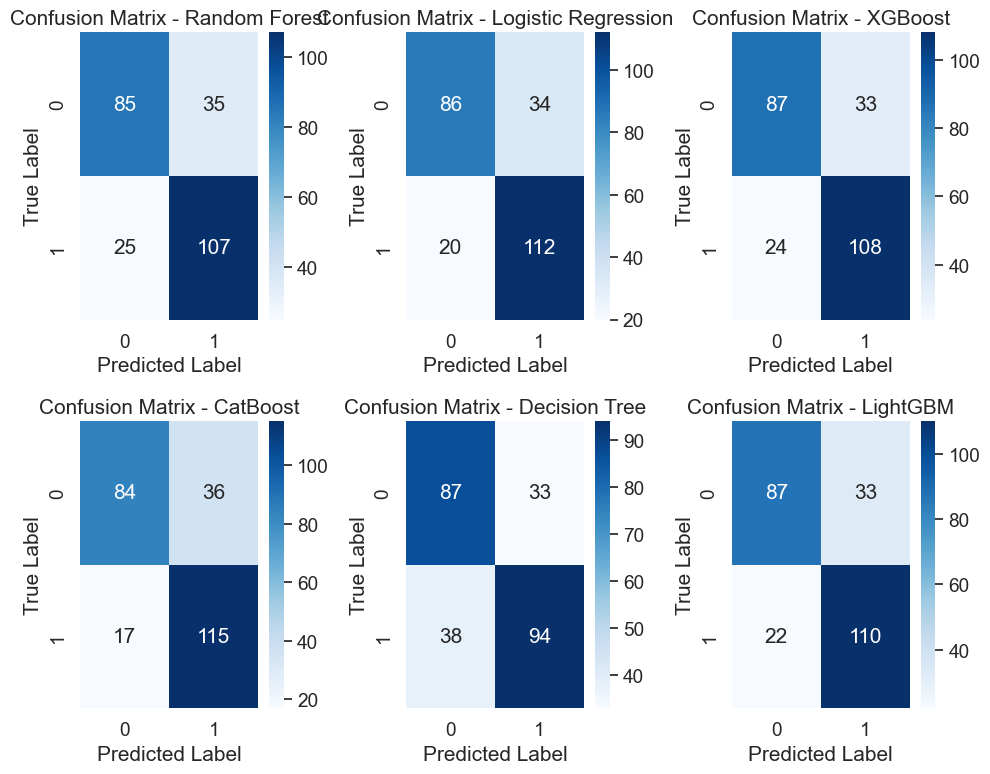

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

classifiers = [
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('XGBoost', XGBClassifier()),
    ('CatBoost', CatBoostClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('LightGBM', lgb.LGBMClassifier())
]

plt.figure(figsize=(10, 8))

for i, (name, classifier) in enumerate(classifiers):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    
    plt.subplot(2, 3, i+1)
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()
